In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
#%matplotlib widget, remove below if used
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [7]:
def shift_correct(input_pos,idx):
    output_pos = np.insert(input_pos,0,np.linspace(0,0,idx))
    return output_pos

def gaussian(data_x,params=list):
    norm = (1/((1/2*params[2])*np.sqrt(np.pi * 2)))
    return params[0] * norm * np.exp(-(np.subtract(data_x,params[1])**2/(2*params[2]**2)))+params[3]

def gaussian_cdf(data_x,params=list):
    # for normalization a 1/sigma could be needed
    return params[0]*0.5*(1+scipy.special.erf((data_x-params[1])/(np.sqrt(2)*params[2])))+params[3]

def linear(data_x,params=list):
    return params[0]*data_x+params[1]

def chisquare_1d(function, functionparams, data_x, data_y,data_y_error):
    chisquarevalue=np.sum(np.power(np.divide(np.subtract(function(data_x,functionparams),data_y),data_y_error),2))
    ndf = len(data_y)-len(functionparams)
    #print(ndf)
    return (chisquarevalue, ndf)

def chisquare_linear(a,b):
    return chisquare_1d(function=linear,functionparams=[a,b],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

def chisquare_gaussian(area,mean,sigma,constant):
    return chisquare_1d(function=gaussian,functionparams=[area,mean,sigma,constant],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

def chisquare_gaussian_cdf(amp,mean,sigma,constant):
    return chisquare_1d(function=gaussian_cdf,functionparams=[amp,mean,sigma,constant],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

In [102]:
pos2 = np.arange(9,13,0.25)
values2 = [7.37,7.28,7.12,6.84,6.37,5.65,4.62,3.41,2.3,1.42,0.77,0.37,0.16,0.04,-0.01,-0.01]


In [100]:
filename = "razorBladeDat.h5"
with h5py.File(filename, "r") as f:
               print(f.keys())
               pos2 = list(f["dRazor_108_y"])
               values2 = list(f["V_108_y"])

<KeysViewHDF5 ['V_108_x', 'V_108_y', 'V_18_y', 'dRazor_108_x', 'dRazor_108_y', 'dRazor_18_y']>


-7.368474316917108 0.6325804168734038
2.5303216674936153
7.362596751216086


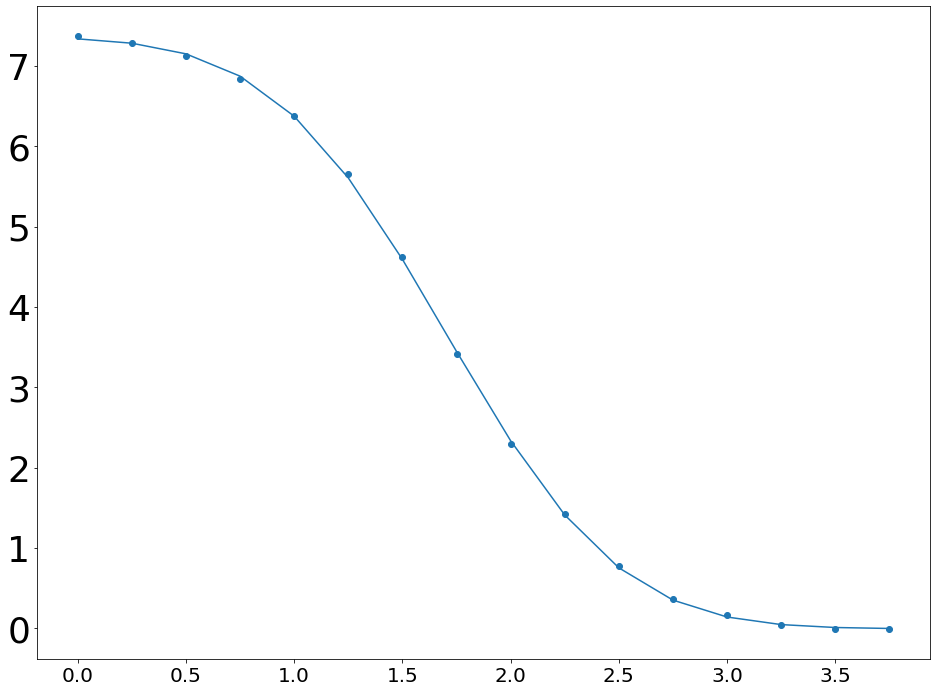

In [104]:
def chisquare_gaussian_cdf(amp,mean,sigma,constant):
    return chisquare_1d(function=gaussian_cdf,functionparams=[amp,mean,sigma,constant],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

data_x = np.multiply(1,pos2-pos2[0]) # give x data
data_y = values2# give y data 
data_y_error = 0.01#np.sqrt(np.abs(data_y))+0.00001 # give y uncertainty  
m=Minuit(chisquare_gaussian_cdf, 
 amp = -7.1, # set start parameter
 #limit_area= (limit_lower,limit_upper) # if you want to limit things
 #limit_amp = (1.5e-9,1.8e-9), # you can also fix it
 mean = 1.5,
 #fix_mean = "True",
 #limit_mean = (3500,4500),
 sigma = 0.4,
 #limit_sigma=(0,2),        
 constant = 7.5, #-1638000000, #739889080,
 #fix_constant="True",
 errordef = 1,
 print_level=0,
 pedantic=False)
 #print('Now proceed with the fit.')
m.migrad(ncall=500000)
print(m.values["amp"],m.values["sigma"])
print(4*m.values["sigma"])
print(m.values["constant"])
plt.scatter(data_x,data_y)
#plt.yscale("log")
plt.plot(data_x,gaussian_cdf(data_x,params=[m.values["amp"],(m.values["mean"]),m.values["sigma"],m.values["constant"]]),alpha=1)
plt.show() 


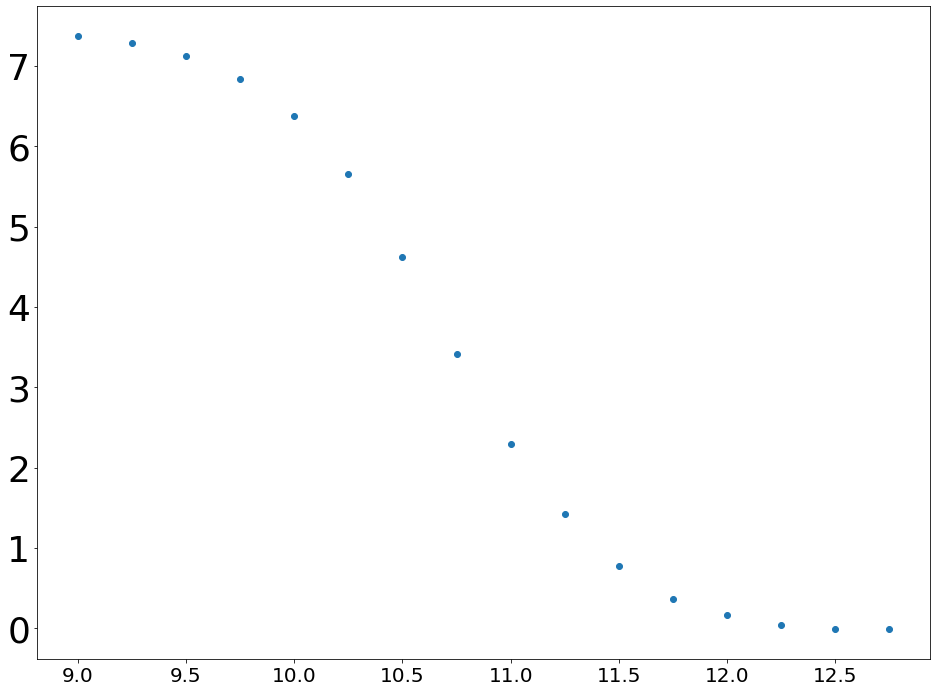

In [67]:
plt.scatter(pos,values)